In [97]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
from matplotlib import cm, ticker
plt.rcParams.update({'font.size': 16})
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.family': 'serif'})

import networkx as nx

import pandas as pd

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import squareform
from seaborn import clustermap, hls_palette

from utils import distance
from utils import CommonFunctions as CF

from galib import models as HM

from scipy.linalg import eig

from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import adjusted_rand_score as ari

from netneurotools import cluster

In [8]:
def load_network(name, return_pos=False):
    folder = f'./data/{name}/'
    nodes = pd.read_csv(folder+'nodes.csv')
    edges = pd.read_csv(folder+'edges.csv')
    
    N = len(nodes)
    mat = np.zeros((N,N))

    vin = edges['# source'].values
    vout = edges[' target'].values

    for i in range(len(vin)):    
        mat[vin[i], vout[i]] = 1
    
    # Remove diagonal
    mat = mat + mat.T - 2*np.diag(np.diag(mat))
    # Remove parallel links
    mat[mat>1] = 1
    
    if return_pos:
        pos = nodes[' _pos'].values
        pos = [tmp.split('[')[1] for tmp in pos]
        pos = [tmp.split(']')[0] for tmp in pos]
        pos = [tmp.split(',') for tmp in pos]
        pos = np.array(pos).astype(float)
        return mat, pos
    else:
        return mat

In [1]:
def plot_results(avg_dd, cmap='Spectral_r', method='ward', name=None, comms=None, row_colors=None, title=None, figsize=(18,8)):
    N = len(avg_dd)
    
    ### Plot clustermap
    # Create linkage
    mylinkage = linkage(squareform(avg_dd), method=method)
    
    # Setup row colors
    if row_colors is None and comms is not None:
        #labels = np.repeat(np.arange(n_comms),N//n_comms)
        #row_colors = [palette[i] for i in labels]
        n_comms = len(np.unique(comms))
        palette = hls_palette(n_comms)
        row_colors = [palette[i] for i in comms]
    
    # Create clustermap
    clust_map = clustermap(avg_dd, row_linkage=mylinkage, col_linkage=mylinkage,
                           cmap=cmap,
                           #cbar_kws = dict(orientation='horizontal'),
                           cbar_pos=None,
                           row_colors=row_colors,
                           tree_kws=dict(linewidths=1.4),
                           figsize=figsize,dendrogram_ratio=0.15, #0.15
                           xticklabels=False, yticklabels=False)

    clust_map.ax_col_dendrogram.set_visible(False) # hide dendrogram above columns
    
    # Update position
    clust_map.gs.update(left=0.5)
    
    # Setup colorbar
    cbnorm = Normalize(vmin=np.min(avg_dd),vmax=np.max(avg_dd)) #setting the scale
    cb = plt.colorbar(cm.ScalarMappable(norm=cbnorm, cmap=cmap),ax=clust_map.ax_heatmap,pad=0.01) #0.08
    #cb.ax.set_title(r'$\overline{d}_{ij}$')
    cb.ax.tick_params(labelsize=20)
    tick_locator = ticker.MaxNLocator(nbins=4)
    cb.locator = tick_locator
    cb.update_ticks()
    
    plt.tight_layout()
    if title is not None:
        plt.title(title, size=40)
    
    if name is not None:
        plt.savefig(name, bbox_inches='tight', pad_inches=0.1)
    
    plt.show()

# 1) CElegans

In [10]:
cele, pos = load_network('celegans', return_pos=True)

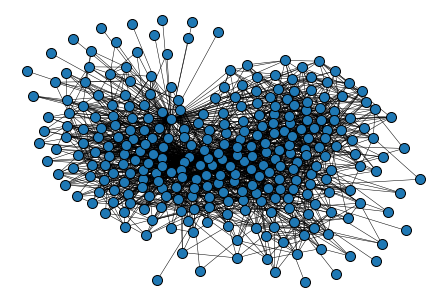

In [11]:
G = nx.from_numpy_array(cele)
nx.draw(G, pos=pos, node_size=100, width=0.5, linewidths=1, edgecolors='k')
#plt.title('Prova')

plt.savefig('figures/figure4_cele.pdf')
#plt.show()

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 1]


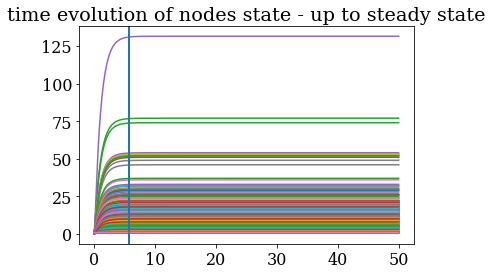

[1, 0, 1]
Normalizing jacobian - $\lambda_{max}=$1.0001816162108739
- Compute average distance...


  0%|          | 0/297 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


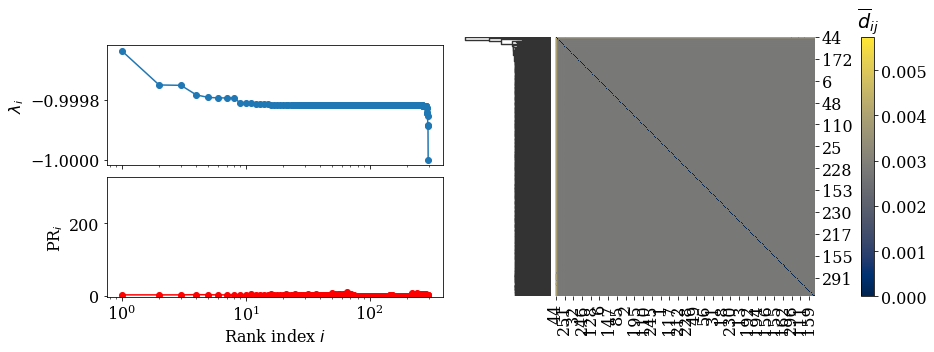

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.5]


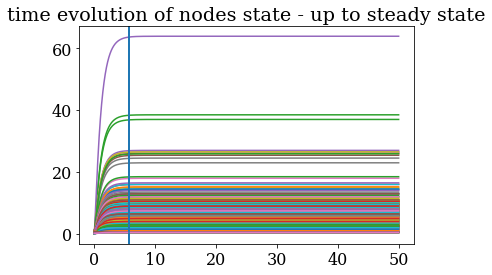

[1, 0, 0.5]
Normalizing jacobian - $\lambda_{max}=$1.0134752710600008
- Compute average distance...


  0%|          | 0/297 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


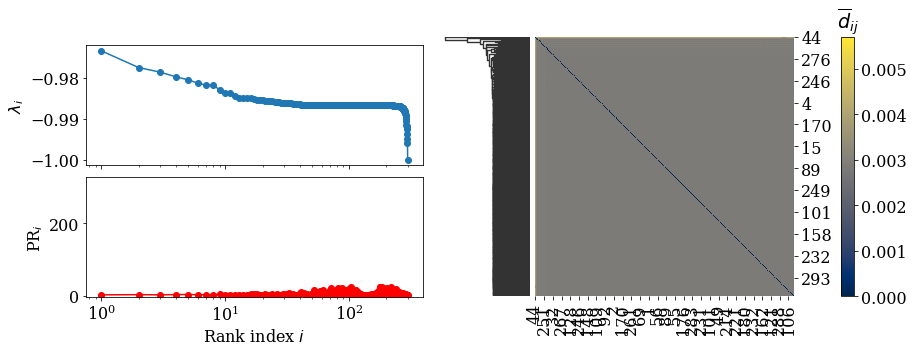

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.3]


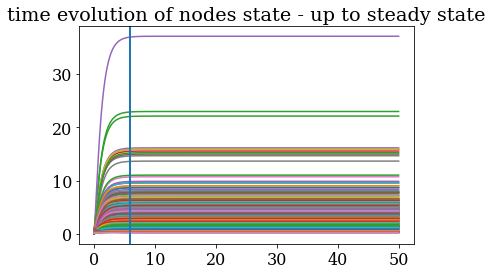

[1, 0, 0.3]
Normalizing jacobian - $\lambda_{max}=$1.058721440451793
- Compute average distance...


  0%|          | 0/297 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


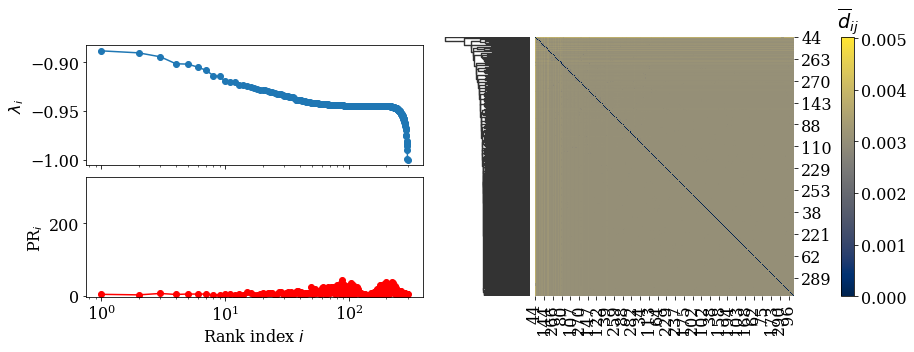

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.2]


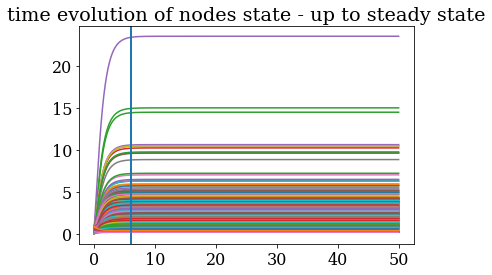

[1, 0, 0.2]
Normalizing jacobian - $\lambda_{max}=$1.1310376869873304
- Compute average distance...


  0%|          | 0/297 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


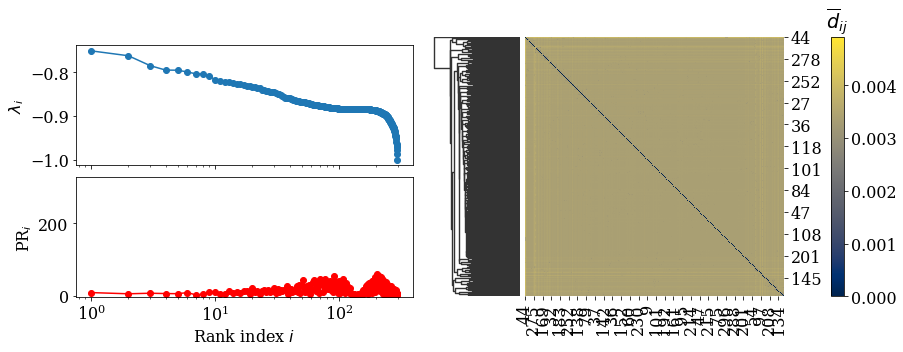

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.1]


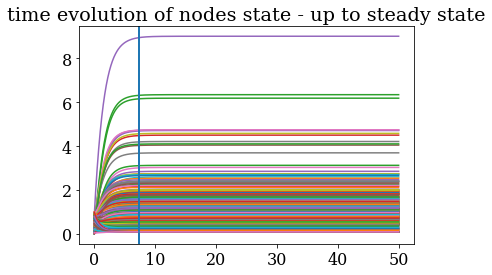

[1, 0, 0.1]
Normalizing jacobian - $\lambda_{max}=$1.2689129975439788
- Compute average distance...


  0%|          | 0/297 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


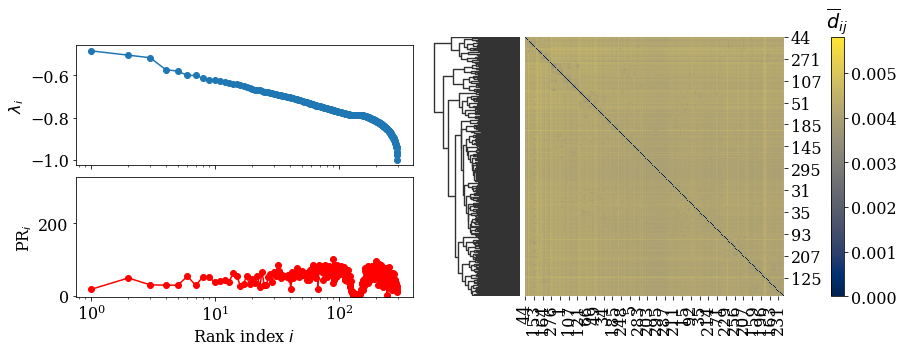

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.01]


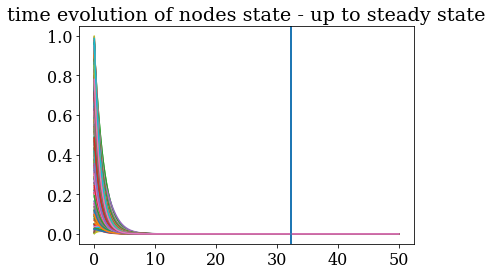

[1, 0, 0.01]
Normalizing jacobian - $\lambda_{max}=$1.12835120046911
- Compute average distance...


  0%|          | 0/297 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


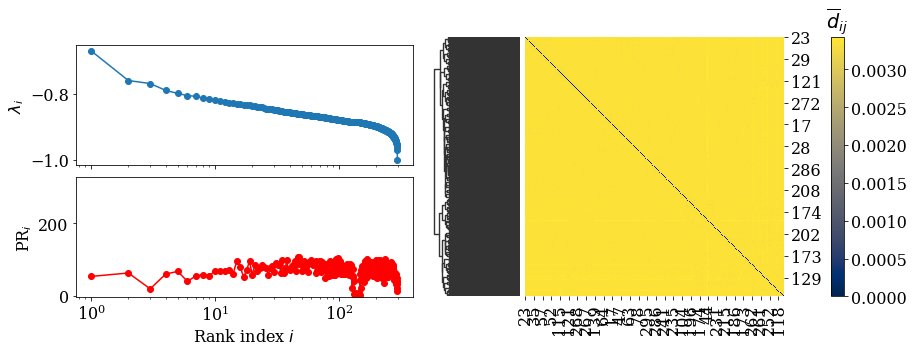

In [12]:
ress_cele = []

s = 0
params = [[1, s, 1], [1, s, 0.5], [1, s, 0.3], [1, s, 0.2], [1, s, 0.1], [1, s, 0.01], [1, s, 0.05]]

for param in params:
    res = distance.jacobian_distance(cele, 'Neuronal', norm=True, args=param, name='cele', title=None, comms=None)
    ress_cele.append(res)

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.05]


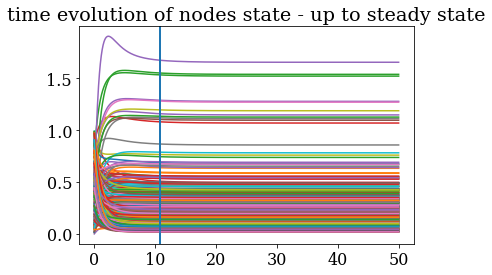

[1, 0, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.3470717228115452
- Compute average distance...


  0%|          | 0/297 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


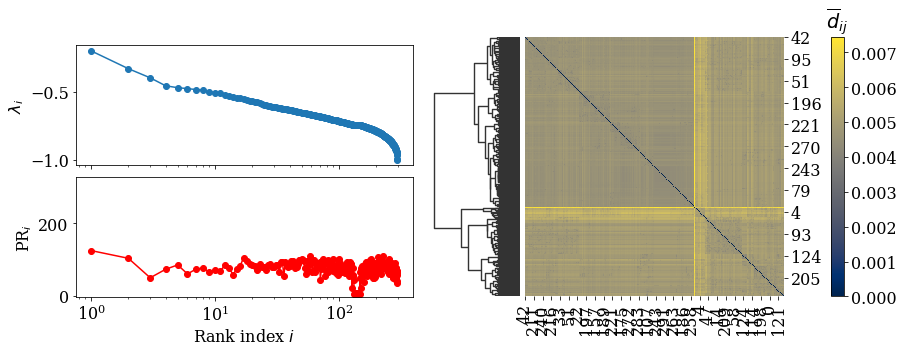

In [14]:
#ress_cele = []

s = 0
#params = [[1, s, 1], [1, s, 0.5], [1, s, 0.3], [1, s, 0.2], [1, s, 0.1], [1, s, 0.01]]
params = [[1, s, 0.05]]

for param in params:
    res = distance.jacobian_distance(cele, 'Neuronal', norm=True, args=param, name='cele', title=None, comms=None)
    ress_cele.append(res)

DIFFUSION DISTANCE
- Compute laplacian...
1.0 1.0
- Compute average distance...


  0%|          | 0/297 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


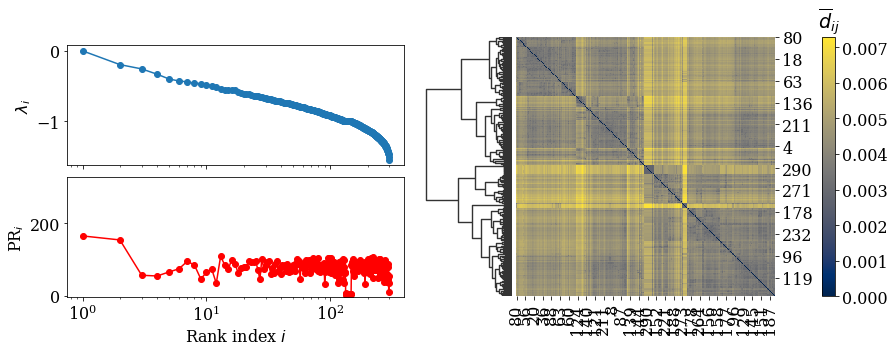

In [17]:
res_diff = distance.diffusion_distance(cele, 'Neuronal', name='cele', title=None, comms=None)

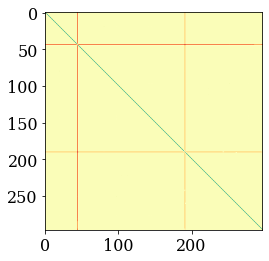

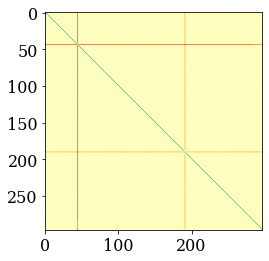

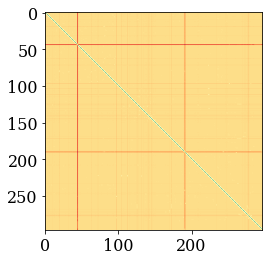

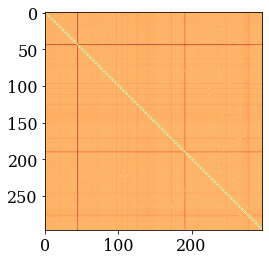

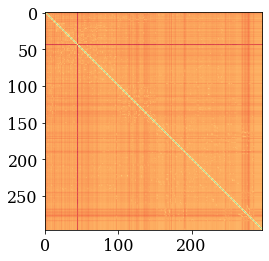

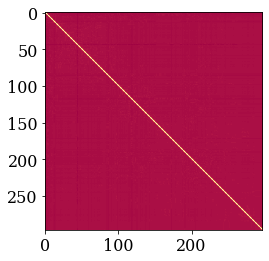

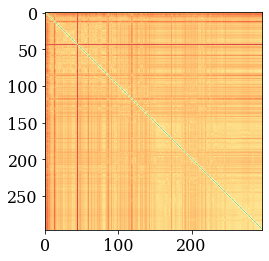

In [150]:
for i, res in enumerate(ress_cele):
    plt.imshow(res[0], cmap='Spectral_r', vmin=np.min(res[0]),vmax=np.max(res[0]))
    plt.show()

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


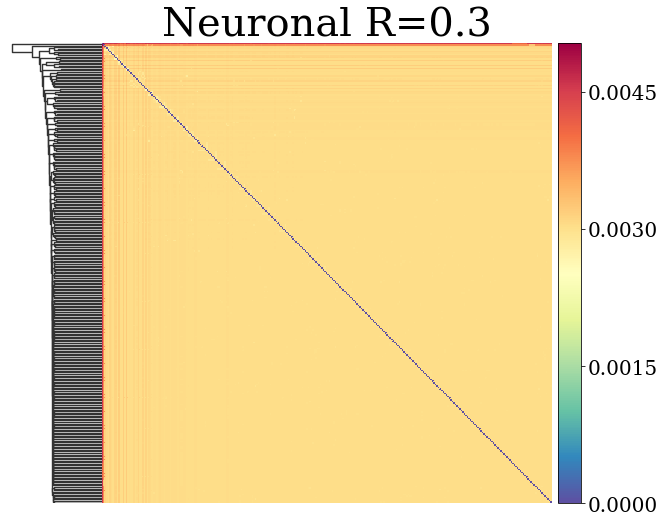

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


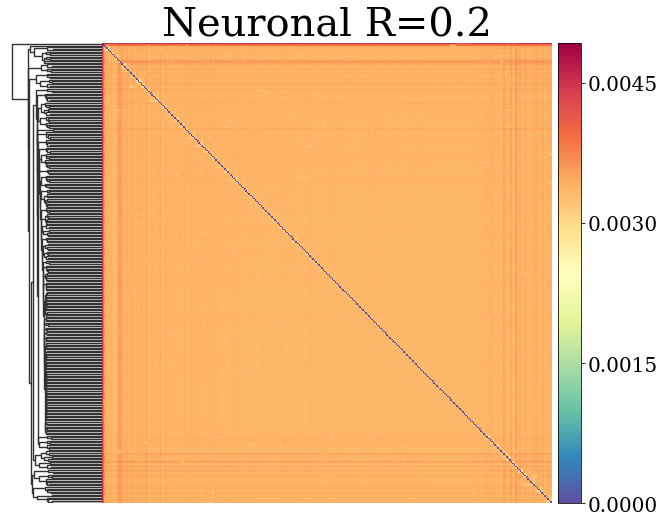

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


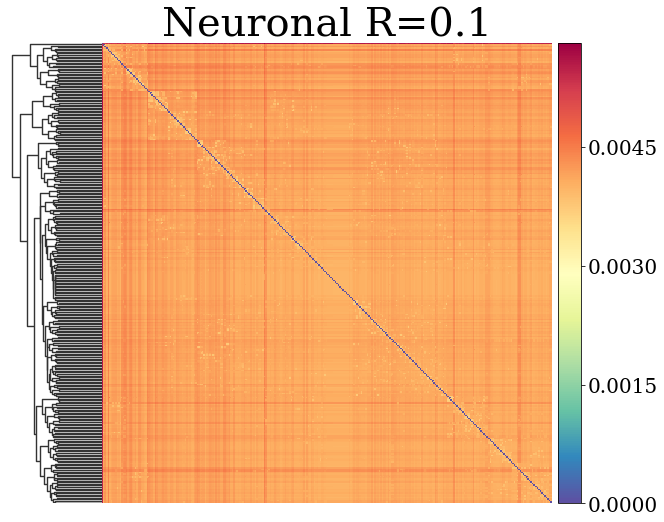

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


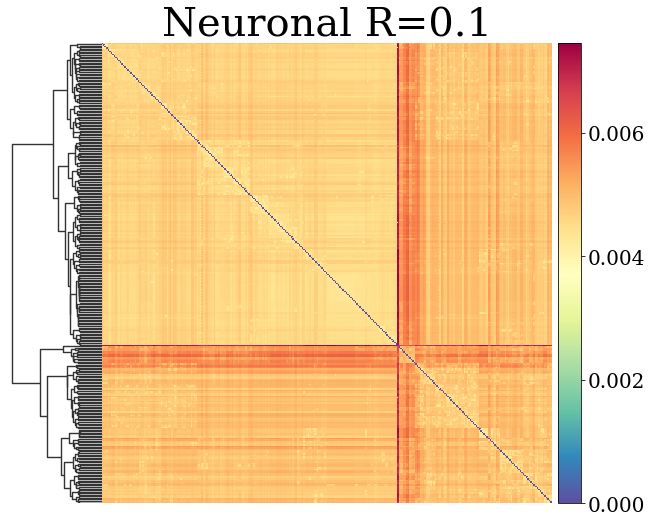

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


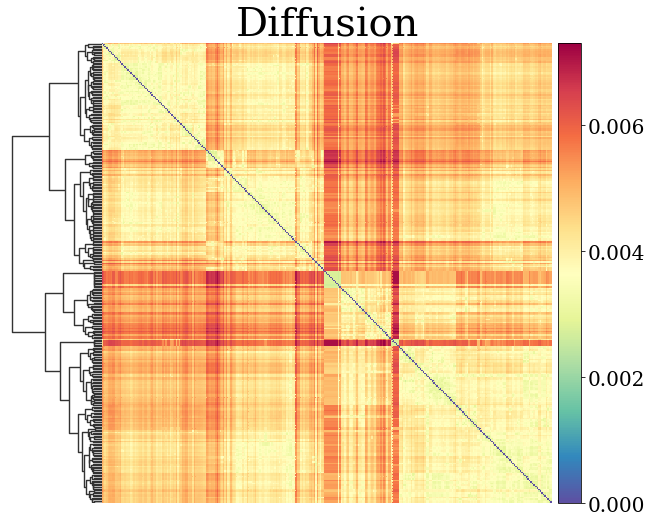

In [227]:
ncomms = np.arange(2,20)

params = [[1, 0, 0.3], [1, 0, 0.2], [1, 0, 0.1], [1, 0, 0.05], 'Diff']

titles = ['Neuronal R=0.3', 'Neuronal R=0.2', 'Neuronal R=0.1', 'Neuronal R=0.1', 'Diffusion']

for i, param in enumerate(params):
    ### Load data
    if param=='Diff':
        fname = 'results/diffusion_cele.txt'
    else:
        fname = 'results/Neuronal_'+str(param)+'_cele.txt'
    tmp = np.loadtxt(fname)
    
    ### Plot
    plot_results(tmp, name=f'figures/figure4_cele_{i+1}.pdf', title=titles[i])

In [221]:
### Compute various time the communities
nrep = 500
print('[+] INFOMAP')
comms_info = [distance.community_detection(cele, 'infomap') for _ in range(nrep)]
print('[+] LOUVAIN')
comms_lou = [distance.community_detection(cele, 'louvain') for _ in range(nrep)]

[+] INFOMAP
Found 7 communities
Found 8 communities
Found 8 communities
Found 7 communities
Found 9 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 8 communities
Found 7 communities
Found 8 communities
Found 7 communities
Found 9 communities
Found 7 communities
Found 7 communities
Found 6 communities
Found 6 communities
Found 8 communities
Found 7 communities
Found 7 communities
Found 8 communities
Found 6 communities
Found 7 communities
Found 7 communities
Found 9 communities
Found 7 communities
Found 6 communities
Found 7 communities
Found 8 communities
Found 6 communities
Found 8 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 8 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 8 communities
Found 8 communities
Found 7 communities
Found 8 communities
Found 8 communities
Found 6 

Found 9 communities
Found 8 communities
Found 8 communities
Found 7 communities
Found 8 communities
Found 6 communities
Found 8 communities
Found 7 communities
Found 6 communities
Found 8 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 8 communities
Found 8 communities
Found 6 communities
Found 7 communities
Found 8 communities
Found 7 communities
Found 8 communities
Found 8 communities
Found 8 communities
Found 7 communities
Found 8 communities
Found 7 communities
Found 7 communities
Found 9 communities
Found 7 communities
Found 8 communities
Found 7 communities
Found 9 communities
Found 8 communities
Found 8 communities
Found 6 communities
Found 8 communities
Found 7 communities
Found 7 communities
Found 7 communities
Found 8 communities
Found 8 communities
Found 6 communities
Found 8 communities
Found 7 communities
Found 8 communities
Found 7 communities
Found 8 communities
Found 7 communities
Found 8 communities
Found 7 communities


Found 5 communities
Found 5 communities
Found 6 communities
Found 6 communities
Found 6 communities
Found 5 communities
Found 6 communities
Found 5 communities
Found 6 communities
Found 6 communities
Found 5 communities
Found 5 communities
Found 6 communities
Found 5 communities
Found 5 communities
Found 6 communities
Found 6 communities
Found 5 communities
Found 6 communities
Found 6 communities
Found 5 communities
Found 6 communities
Found 5 communities
Found 5 communities
Found 5 communities
Found 5 communities
Found 6 communities
Found 6 communities
Found 5 communities
Found 6 communities
Found 5 communities
Found 5 communities
Found 6 communities
Found 5 communities
Found 5 communities
Found 5 communities
Found 6 communities
Found 6 communities
Found 6 communities
Found 5 communities
Found 6 communities
Found 5 communities
Found 5 communities
Found 6 communities
Found 5 communities
Found 6 communities
Found 5 communities
Found 5 communities
Found 5 communities
Found 6 communities


In [222]:
np.column_stack(comms_info)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [2, 2, 2, ..., 2, 1, 2],
       ...,
       [4, 5, 5, ..., 2, 1, 4],
       [6, 6, 6, ..., 5, 4, 5],
       [6, 6, 6, ..., 5, 4, 5]])

In [223]:
cons_info = cluster.find_consensus(np.column_stack(comms_info))
cons_info = np.array(cons_info)-1
print(np.unique(cons_info))

cons_lou = cluster.find_consensus(np.column_stack(comms_lou))
cons_lou = np.array(cons_lou)-1
print(np.unique(cons_lou))

[0 1 2 3 4]
[0 1 2 3 4]


In [230]:
ncomms = np.arange(2,40)

params = [[1, 0, 0.3], [1, 0, 0.2], [1, 0, 0.1], 'Diff']

infos = np.zeros((2,len(params),len(ncomms)))

for i, param in enumerate(params):
    ### Load data
    if param=='Diff':
        fname = 'results/diffusion_cele.txt'
    else:
        fname = 'results/Neuronal_'+str(param)+'_cele.txt'
    tmp = np.loadtxt(fname)
    
    ### Compute dendrogram
    mylinkage = linkage(squareform(tmp), method='ward')
    ### Compute communities = cut dendrogram
    comms = [fcluster(mylinkage, criterion='maxclust', t=t) for t in ncomms]
    
    ### Compute index
    infos[0,i] = [ami(tmp, cons_info) for tmp in comms]
    infos[1,i] = [ami(tmp, cons_lou) for tmp in comms]

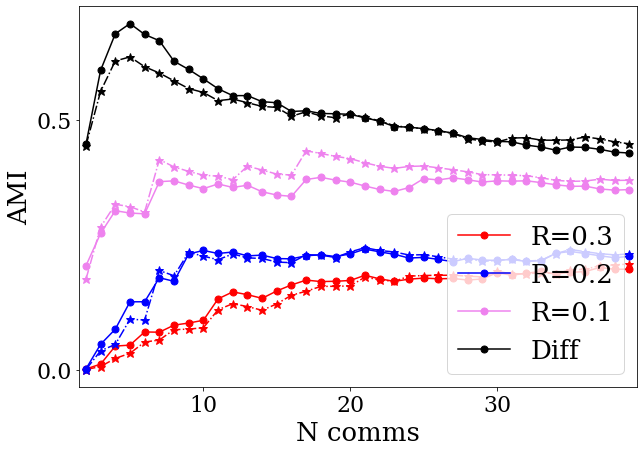

In [232]:
plt.figure(figsize=(10,7))
#cmap = plt.cm.get_cmap('Set1',len(params))
colors = ['Red', 'Blue', 'Violet', 'Green']

ms = 7
size=26

for i, param in enumerate(params[:-1]):
    plt.plot(ncomms, infos[0,i], '-o', label='R='+str(param[2]), c=colors[i], ms=ms)
    plt.plot(ncomms, infos[1,i], '-.*', c=colors[i], ms=ms+2)
plt.plot(ncomms, infos[0,len(params)-1], '-o', label='Diff', c='k', ms=ms)
plt.plot(ncomms, infos[1,len(params)-1], '-.*', c='k', ms=ms+2)

plt.xlabel('N comms', size=size)
plt.ylabel('AMI', size=size)

#plt.plot([], [], 'o', label='Infomap', color='k', ms=ms)
#plt.plot([], [], '*', label='Louvain', color='k', ms=ms+2)

'''
# Handle legend
handles, labels = ax.get_legend_handles_labels()

# manually define a new patch 
patch1 = mpatches.Patch(color='grey', label='Manual Label')

# handles is a list, so append manual patch
handles.append(patch)

plt.legend(handles=handles)
'''

plt.legend(fontsize=size, loc='lower right')
plt.locator_params(nbins=3)
plt.xticks(fontsize=size-4)
plt.yticks(fontsize=size-4)
plt.xlim(ncomms[0]-.5, ncomms[-1]+.5)

plt.savefig('figures/figure4_neuronal_ami.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

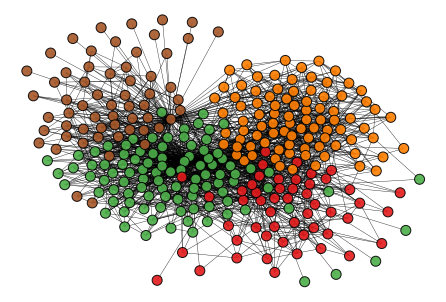

In [140]:
comms_now = cons_lou

cmap = plt.get_cmap('Set1', 5)
colors = [cmap(i) for i in comms_now]

G = nx.from_numpy_array(cele)
nx.draw(G, pos=pos, node_size=100, width=0.4, linewidths=1, edgecolors='k', node_color=colors, alpha=0.9)

plt.savefig('figures/figure4_cele_network.pdf')
#plt.show()

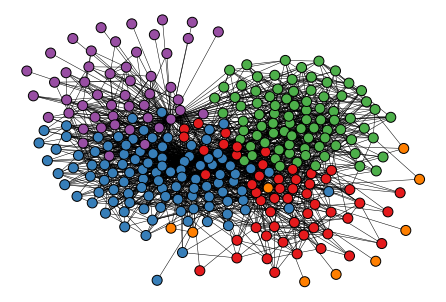

In [125]:
comms_now = cons_info

cmap = plt.get_cmap('Set1')
colors = [cmap(i) for i in cons_info]

G = nx.from_numpy_array(cele)
nx.draw(G, pos=pos, node_size=100, width=0.5, linewidths=1, edgecolors='k', node_color=colors)

#plt.savefig('figures/figure4_cele.pdf')
#plt.show()

In [91]:
comms_lou[-1]

array([0, 0, 1, 2, 2, 0, 3, 0, 0, 0, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1,
       3, 3, 3, 3, 2, 3, 3, 1, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 3, 3,
       3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 4, 4,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 4, 4, 4, 4, 2, 4, 1, 1, 1, 1, 1, 4,
       4, 4, 2, 2, 2, 2, 1, 4, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 2,
       1, 4, 0, 0, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 3, 0,
       1, 1, 1, 2, 4, 1, 1, 4, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1])

# 2) EColi

In [207]:
ecoli, pos = load_network('ecoli', return_pos=True)

G = nx.from_numpy_array(ecoli)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
print(nx.is_connected(G0))

ecoli = nx.to_numpy_array(G0)

node_ok = np.array(list(G0.nodes))
pos = pos[node_ok]

True


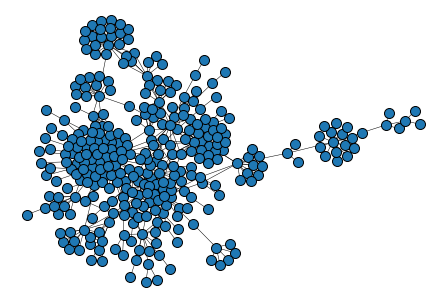

In [177]:
nx.draw(nx.from_numpy_array(ecoli), pos=pos, node_size=100, width=0.5, linewidths=1, edgecolors='k')

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 1, 1, 1]


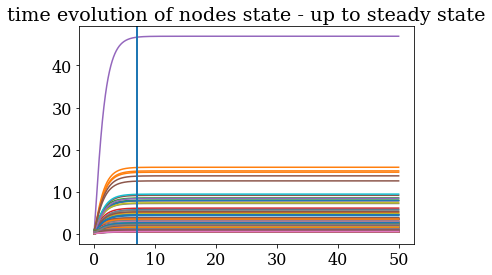

[1, 1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.4210076507775424
- Compute average distance...


  0%|          | 0/328 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


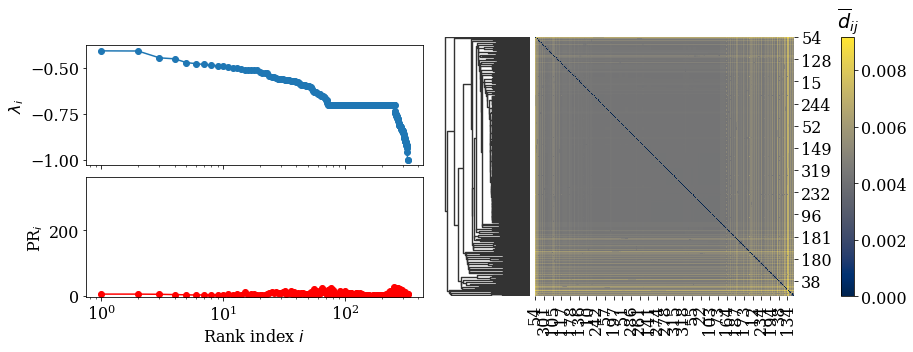

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 0.5, 1, 1]


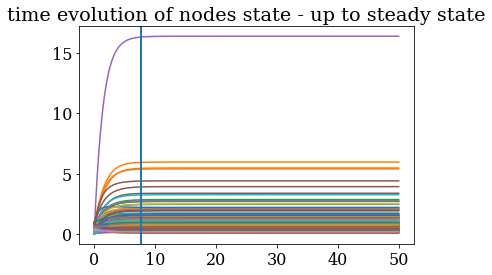

[1, 0.5, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.6327295985938084
- Compute average distance...


  0%|          | 0/328 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


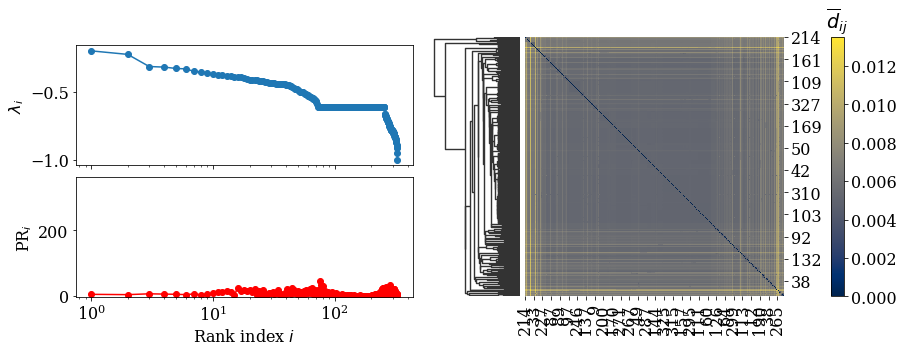

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 0.4, 1, 1]


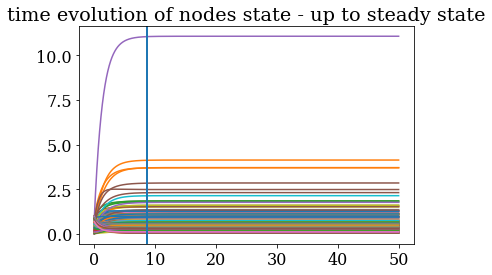

[1, 0.4, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.685893772678131
- Compute average distance...


  0%|          | 0/328 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


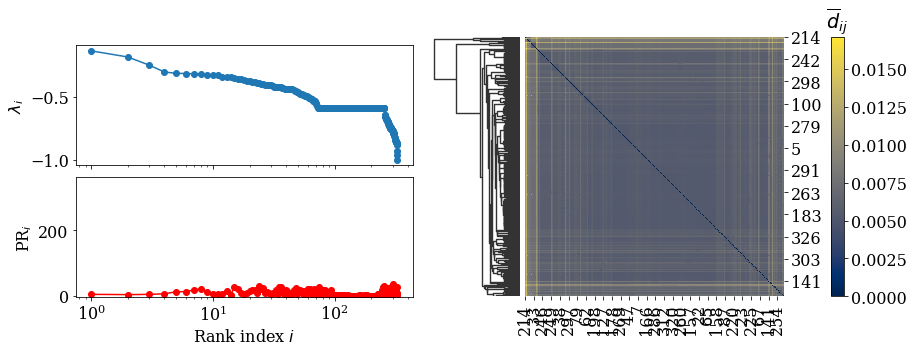

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 0.3, 1, 1]


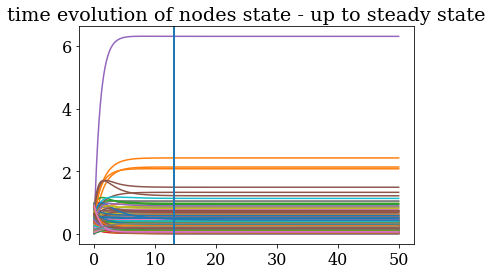

[1, 0.3, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.7662760576807761
- Compute average distance...


  0%|          | 0/328 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


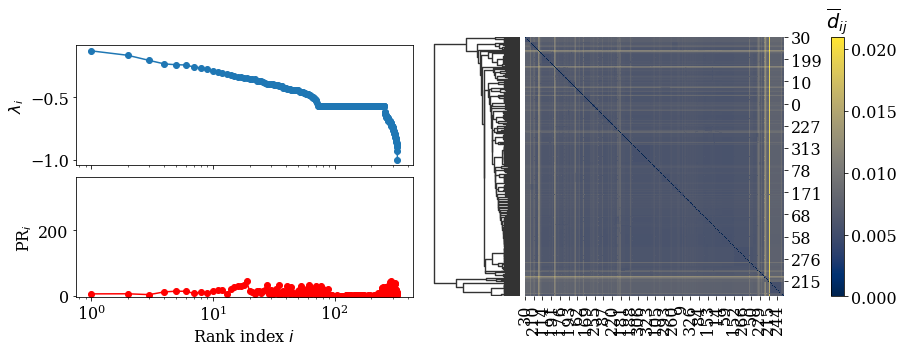

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 0.1, 1, 1]


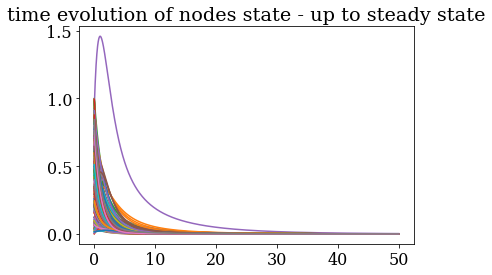

[1, 0.1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.856980359004126
- Compute average distance...


  0%|          | 0/328 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


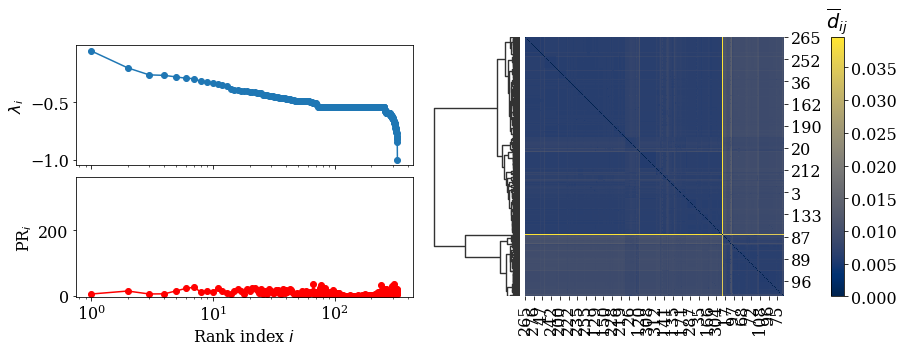

In [188]:
params = [[1, 1, 1, 1], [1, 0.5, 1, 1], [1, 0.4, 1, 1], [1, 0.3, 1, 1], [1, 0.1, 1, 1]]

ress_ecoli = []

for param in params:
    res = distance.jacobian_distance(ecoli, 'Regulatory', norm=True, args=param, name='ecoli', title=None, comms=None)
    ress_ecoli.append(res)

In [ ]:
res = distance.diffusion_distance(ecoli, name='ecoli', title=None, comms=None)

DIFFUSION DISTANCE
- Compute laplacian...
1.0 1.0
- Compute average distance...


  0%|          | 0/328 [00:00<?, ?it/s]

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


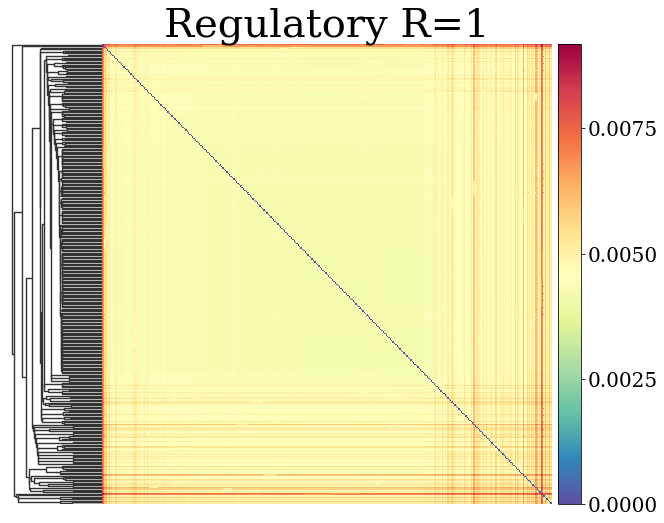

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


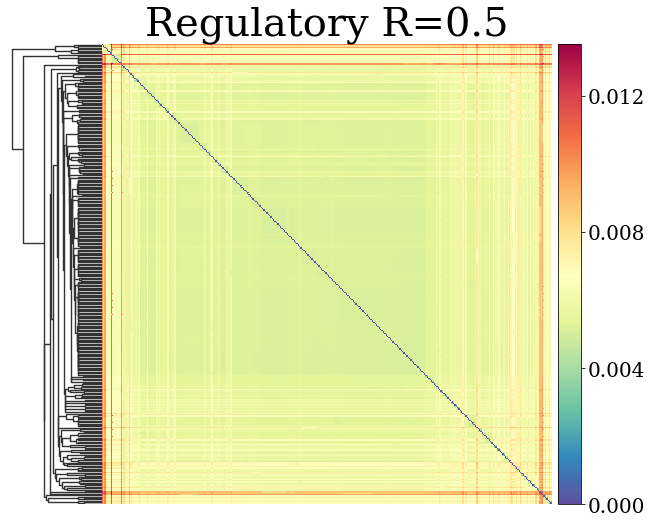

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


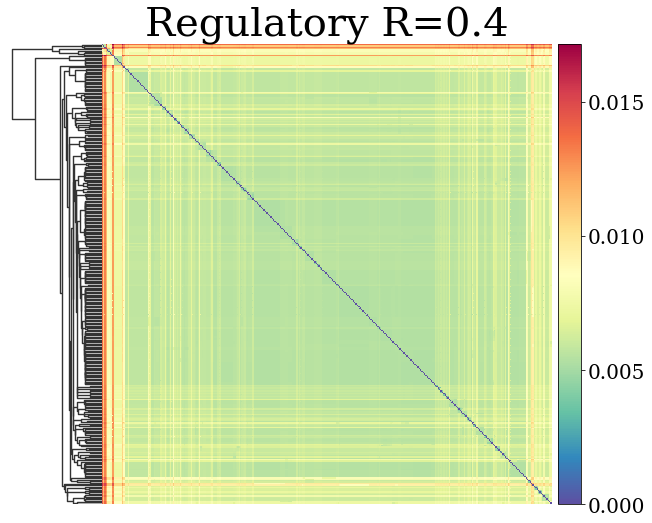

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


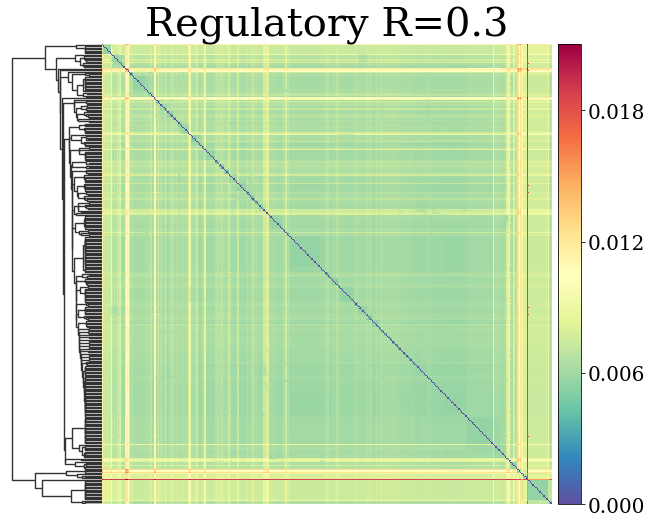

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


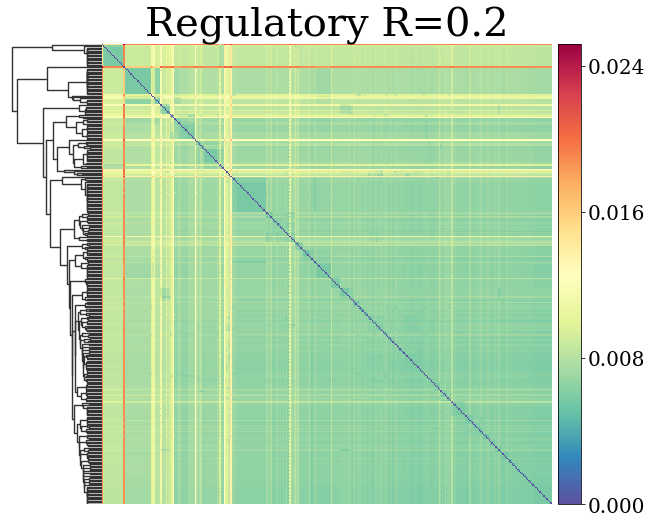

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


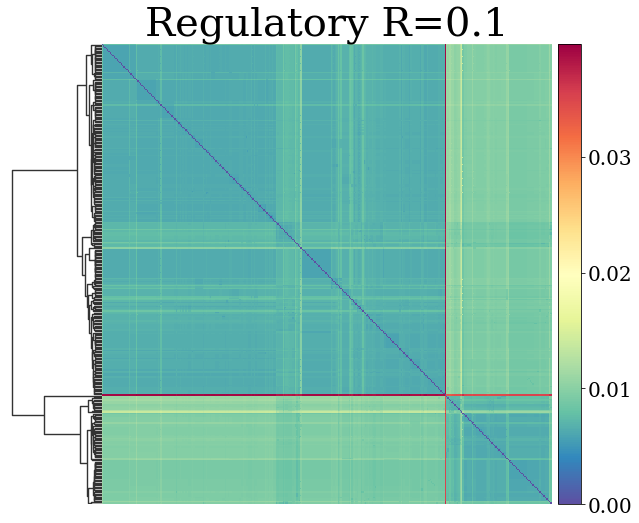

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


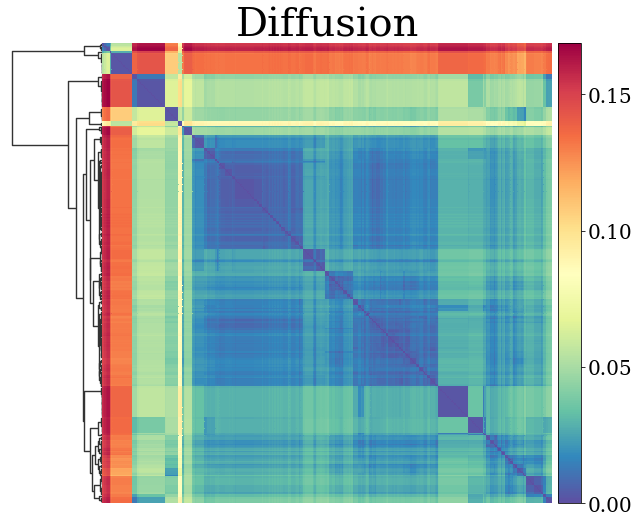

In [214]:
params = [1, 0.5, 0.4, 0.3, 0.2, 0.1]
params = [[1, tt, 1, 1] for tt in params]
params.append('Diff')

titles = ['Regulatory R=1', 'Regulatory R=0.5', 'Regulatory R=0.4', 'Regulatory R=0.3', 'Regulatory R=0.2', 'Regulatory R=0.1', 'Diffusion']

for i, param in enumerate(params):
    ### Load data
    if param=='Diff':
        fname = 'results/diffusion_ecoli.txt'
    else:
        fname = 'results/Regulatory_'+str(param)+'_ecoli.txt'
    tmp = np.loadtxt(fname)
    
    ### Plot
    plot_results(tmp, name=f'figures/figure4_ecoli_{i+1}.pdf', title=titles[i])

In [240]:
### Compute various time the communities
nrep = 500
comms_info = [distance.community_detection(ecoli, 'infomap') for _ in range(nrep)]
comms_lou = [distance.community_detection(ecoli, 'louvain') for _ in range(nrep)]

cons_info = cluster.find_consensus(np.column_stack(comms_info))
cons_info = np.array(cons_info)-1
print(np.unique(cons_info))

cons_lou = cluster.find_consensus(np.column_stack(comms_lou))
cons_lou = np.array(cons_lou)-1
print(np.unique(cons_lou))

Found 39 communities
Found 38 communities
Found 39 communities
Found 40 communities
Found 38 communities
Found 39 communities
Found 39 communities
Found 38 communities
Found 40 communities
Found 39 communities
Found 38 communities
Found 38 communities
Found 39 communities
Found 38 communities
Found 38 communities
Found 38 communities
Found 39 communities
Found 40 communities
Found 40 communities
Found 38 communities
Found 38 communities
Found 39 communities
Found 39 communities
Found 38 communities
Found 38 communities
Found 38 communities
Found 40 communities
Found 38 communities
Found 38 communities
Found 40 communities
Found 39 communities
Found 39 communities
Found 39 communities
Found 40 communities
Found 38 communities
Found 38 communities
Found 39 communities
Found 39 communities
Found 38 communities
Found 39 communities
Found 39 communities
Found 39 communities
Found 39 communities
Found 38 communities
Found 39 communities
Found 39 communities
Found 40 communities
Found 39 comm

Found 39 communities
Found 39 communities
Found 39 communities
Found 38 communities
Found 38 communities
Found 38 communities
Found 39 communities
Found 39 communities
Found 38 communities
Found 39 communities
Found 38 communities
Found 38 communities
Found 38 communities
Found 39 communities
Found 39 communities
Found 39 communities
Found 39 communities
Found 38 communities
Found 38 communities
Found 38 communities
Found 40 communities
Found 38 communities
Found 38 communities
Found 40 communities
Found 39 communities
Found 39 communities
Found 39 communities
Found 39 communities
Found 38 communities
Found 38 communities
Found 38 communities
Found 39 communities
Found 40 communities
Found 40 communities
Found 40 communities
Found 39 communities
Found 38 communities
Found 38 communities
Found 39 communities
Found 38 communities
Found 39 communities
Found 39 communities
Found 40 communities
Found 39 communities
Found 38 communities
Found 39 communities
Found 39 communities
Found 38 comm

Found 12 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 12 communities
Found 13 communities
Found 13 communities
Found 12 communities
Found 12 communities
Found 12 communities
Found 12 communities
Found 12 communities
Found 13 communities
Found 12 communities
Found 11 communities
Found 12 communities
Found 13 communities
Found 13 communities
Found 11 communities
Found 12 communities
Found 12 communities
Found 13 communities
Found 12 communities
Found 12 communities
Found 12 communities
Found 12 communities
Found 14 communities
Found 11 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 12 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 11 communities
Found 13 communities
Found 12 communities
Found 12 communities
Found 13 communities
Found 13 communities
Found 12 communities
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 

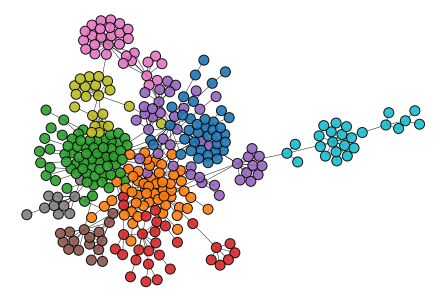

In [210]:
comms_now = cons_lou

cmap = plt.get_cmap('tab10', len(np.unique(comms_now)))
colors = [cmap(i) for i in comms_now]

G = nx.from_numpy_array(ecoli)
nx.draw(G, pos=pos, node_size=100, width=0.5, linewidths=1, edgecolors='k', node_color=colors, alpha=0.9)

plt.savefig('figures/figure4_ecoli_network.pdf')
#plt.show()

In [250]:
ncomms = np.arange(2,40)

#params = [0.5, 0.4, 0.3, 0.2, 0.1]
params = [0.5, 0.4, 0.2]
params = [[1, tt, 1, 1] for tt in params]
params.append('Diff')

infos = np.zeros((2,len(params),len(ncomms)))

for i, param in enumerate(params):
    ### Load data
    if param=='Diff':
        fname = 'results/diffusion_ecoli.txt'
    else:
        fname = 'results/Regulatory_'+str(param)+'_ecoli.txt'
    tmp = np.loadtxt(fname)
    
    ### Compute dendrogram
    mylinkage = linkage(squareform(tmp), method='ward')
    ### Compute communities = cut dendrogram
    comms = [fcluster(mylinkage, criterion='maxclust', t=t) for t in ncomms]
    
    ### Compute index
    infos[0,i] = [ami(tmp, cons_info) for tmp in comms]
    infos[1,i] = [ami(tmp, cons_lou) for tmp in comms]

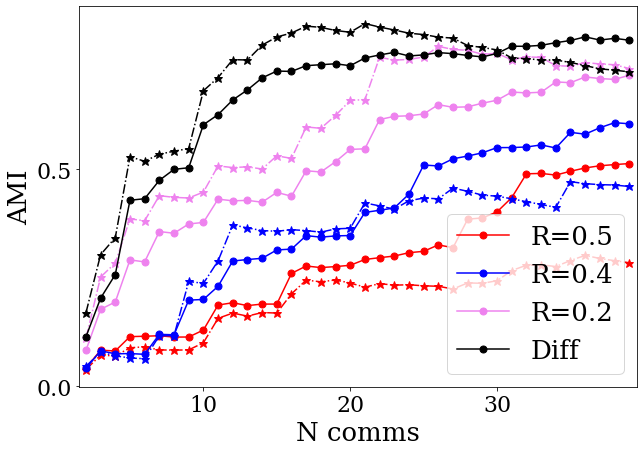

In [251]:
plt.figure(figsize=(10,7))
#cmap = plt.cm.get_cmap('Set1',len(params))
colors = ['Red', 'Blue', 'Violet']

ms = 7
size=26

for i, param in enumerate(params[:-1]):
    plt.plot(ncomms, infos[0,i], '-o', label='R='+str(param[1]), c=colors[i], ms=ms)
    plt.plot(ncomms, infos[1,i], '-.*', c=colors[i], ms=ms+2)
plt.plot(ncomms, infos[0,len(params)-1], '-o', label='Diff', c='k', ms=ms)
plt.plot(ncomms, infos[1,len(params)-1], '-.*', c='k', ms=ms+2)
    
plt.xlabel('N comms', size=size)
plt.ylabel('AMI', size=size)

#plt.plot([], [], 'o', label='Infomap', color='k', ms=ms)
#plt.plot([], [], '*', label='Louvain', color='k', ms=ms+2)

'''
# Handle legend
handles, labels = ax.get_legend_handles_labels()

# manually define a new patch 
patch1 = mpatches.Patch(color='grey', label='Manual Label')

# handles is a list, so append manual patch
handles.append(patch)

plt.legend(handles=handles)
'''

plt.legend(fontsize=size, loc='lower right')
plt.locator_params(nbins=3)
plt.xticks(fontsize=size-4)
plt.yticks(fontsize=size-4)
plt.xlim(ncomms[0]-.5, ncomms[-1]+.5)

plt.savefig('figures/figure4_ecoli_ami.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

# 3) Social

In [192]:
social, pos = load_network('social', return_pos=True)

G = nx.from_numpy_array(social)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
print(nx.is_connected(G0))

social = nx.to_numpy_array(G0)

node_ok = np.array(list(G0.nodes))
pos = pos[node_ok]

True


DIFFUSION DISTANCE
- Compute laplacian...
1.0 1.0
- Compute average distance...


  0%|          | 0/141 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


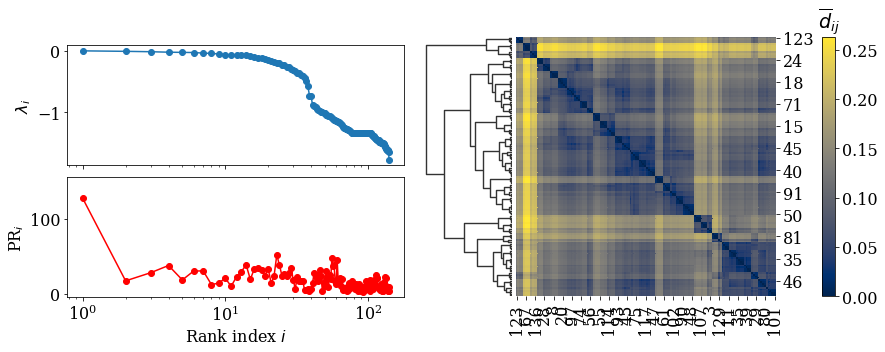

In [193]:
res = distance.diffusion_distance(social, name='social', title=None, comms=None)

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


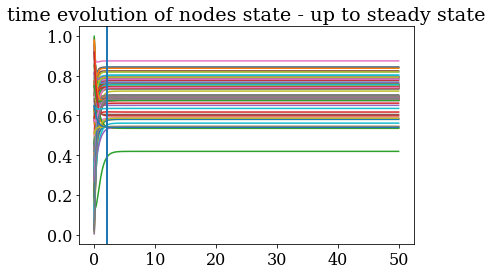

[1, 1]
Normalizing jacobian - $\lambda_{max}=$8.024663551591122
- Compute average distance...


  0%|          | 0/141 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


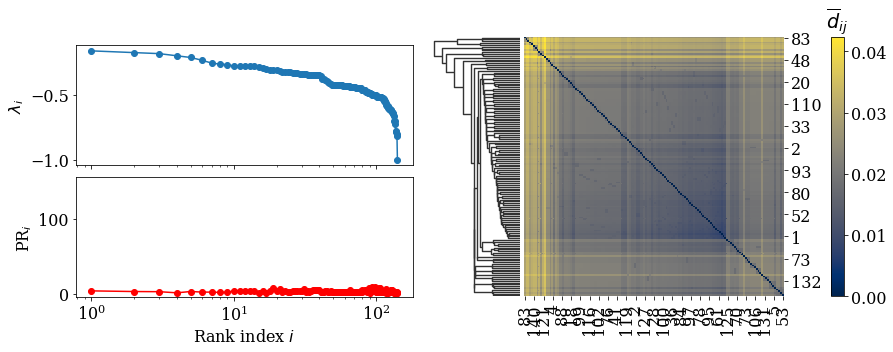

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.5]


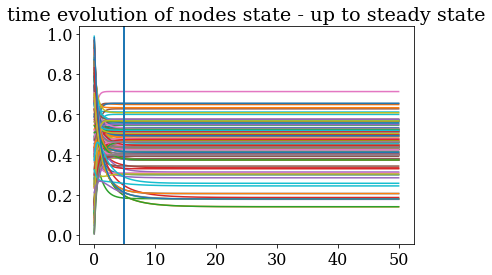

[1, 0.5]
Normalizing jacobian - $\lambda_{max}=$3.6910931085109207
- Compute average distance...


  0%|          | 0/141 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


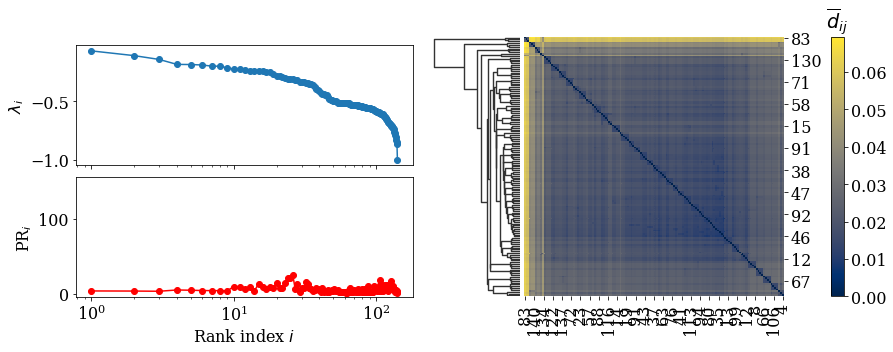

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.1]


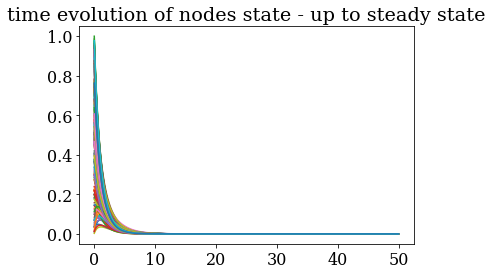

[1, 0.1]
Normalizing jacobian - $\lambda_{max}=$1.3308988201052956
- Compute average distance...


  0%|          | 0/141 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


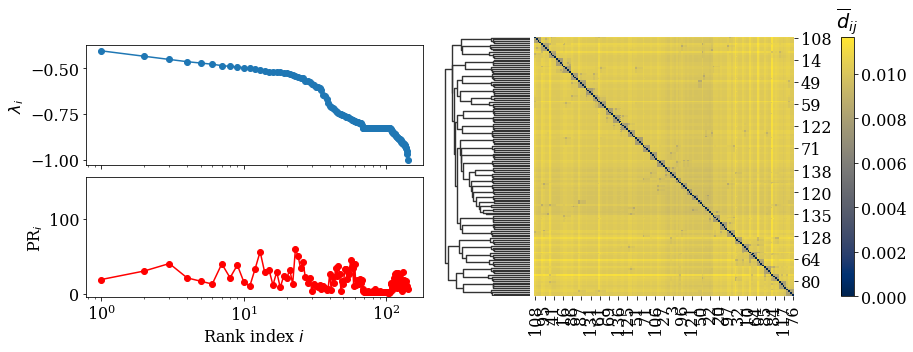

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.01]


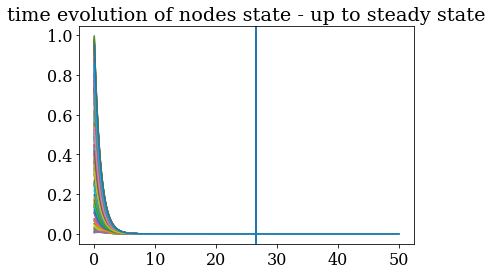

[1, 0.01]
Normalizing jacobian - $\lambda_{max}=$1.0330898820136136
- Compute average distance...


  0%|          | 0/141 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


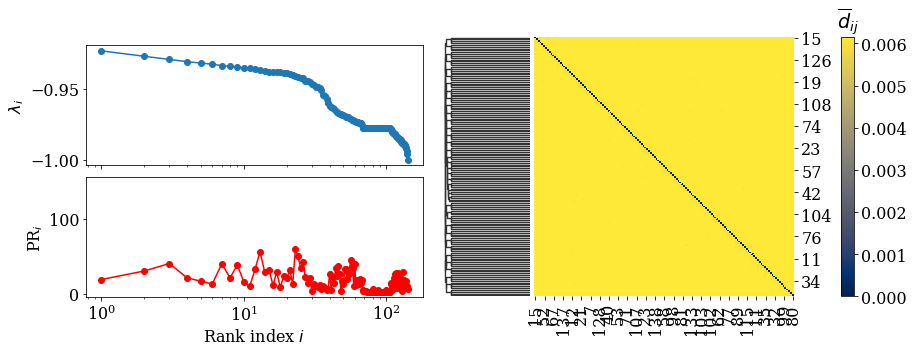

In [194]:
params = [[1, 1], [1, 0.5], [1, 0.1], [1, 0.01]]

ress_social = []

for param in params:
    res = distance.jacobian_distance(social, 'Epidemics', norm=True, args=param, name='social', title=None, comms=None)
    ress_social.append(res)

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


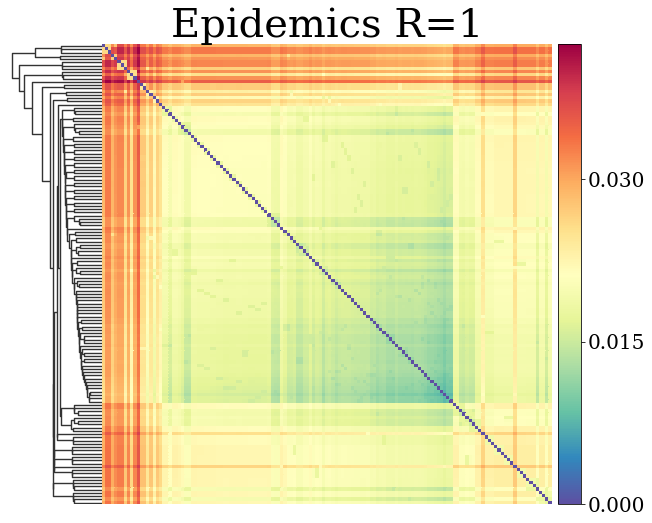

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


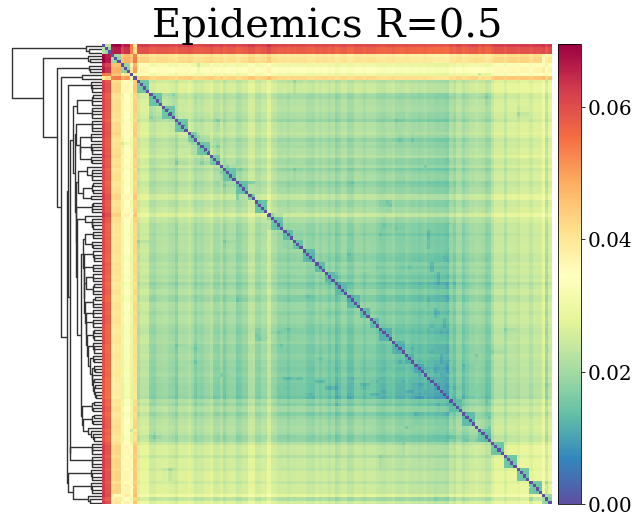

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


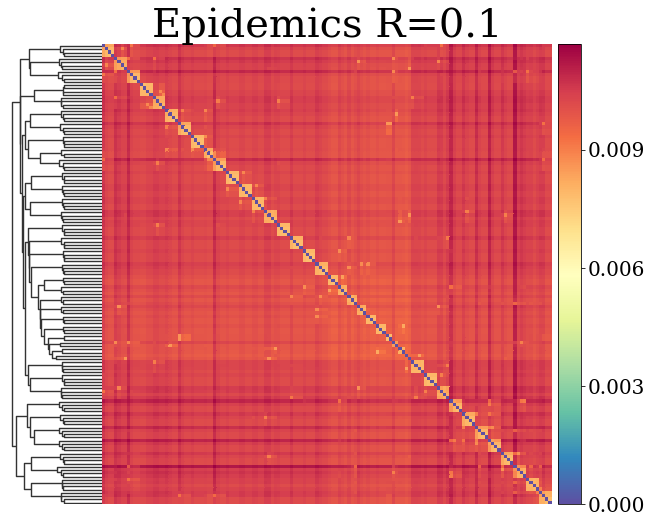

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


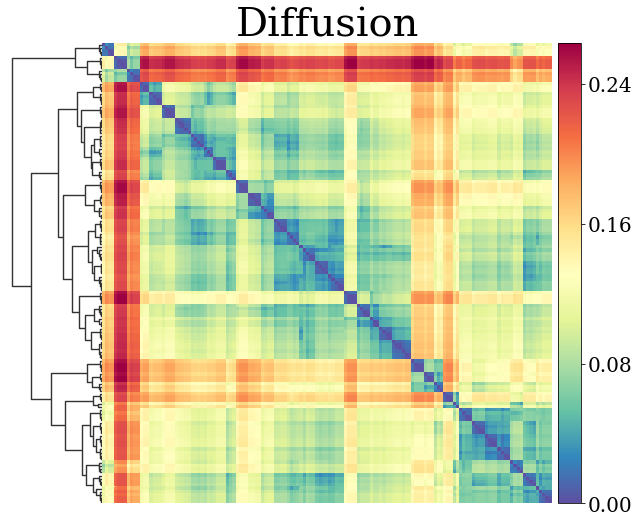

In [213]:
params = [[1, 1], [1, 0.5], [1, 0.1]]
params.append('Diff')

titles = ['Epidemics R=1', 'Epidemics R=0.5', 'Epidemics R=0.1', 'Diffusion']

for i, param in enumerate(params):
    ### Load data
    if param=='Diff':
        fname = 'results/diffusion_social.txt'
    else:
        fname = 'results/Epidemics_'+str(param)+'_social.txt'
    tmp = np.loadtxt(fname)
    
    ### Plot
    plot_results(tmp, name=f'figures/figure4_social_{i+1}.pdf', title=titles[i])

In [237]:
### Compute various time the communities
nrep = 500
comms_info = [distance.community_detection(social, 'infomap') for _ in range(nrep)]
comms_lou = [distance.community_detection(social, 'louvain') for _ in range(nrep)]


cons_info = cluster.find_consensus(np.column_stack(comms_info))
cons_info = np.array(cons_info)-1
print(np.unique(cons_info))

cons_lou = cluster.find_consensus(np.column_stack(comms_lou))
cons_lou = np.array(cons_lou)-1
print(np.unique(cons_lou))

Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 comm

Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 communities
Found 31 comm

Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 12 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 12 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 12 communities
Found 13 communities
Found 13 communities
Found 14 communities
Found 13 communities
Found 13 communities
Found 12 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 communities
Found 13 comm

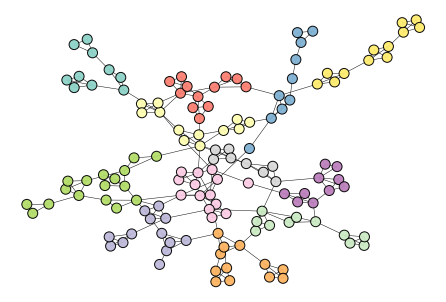

In [206]:
comms_now = cons_lou

cmap = plt.get_cmap('Set3', len(np.unique(comms_now)))
colors = [cmap(i) for i in comms_now]

G = nx.from_numpy_array(social)
nx.draw(G, pos=pos, node_size=100, width=0.5, linewidths=1, edgecolors='k', node_color=colors, alpha=0.95)

plt.savefig('figures/figure4_social_network.pdf')
#plt.show()

In [238]:
ncomms = np.arange(2,40)

params = [[1, 1], [1, 0.5], [1, 0.1]]
params.append('Diff')

infos = np.zeros((2,len(params),len(ncomms)))

for i, param in enumerate(params):
    ### Load data
    if param=='Diff':
        fname = 'results/diffusion_social.txt'
    else:
        fname = 'results/Epidemics_'+str(param)+'_social.txt'
    tmp = np.loadtxt(fname)
    
    ### Compute dendrogram
    mylinkage = linkage(squareform(tmp), method='ward')
    ### Compute communities = cut dendrogram
    comms = [fcluster(mylinkage, criterion='maxclust', t=t) for t in ncomms]
    
    ### Compute index
    infos[0,i] = [ami(tmp, cons_info) for tmp in comms]
    infos[1,i] = [ami(tmp, cons_lou) for tmp in comms]

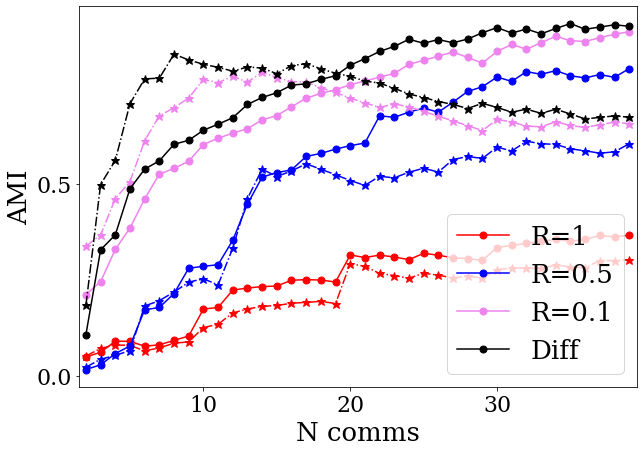

In [239]:
plt.figure(figsize=(10,7))
#cmap = plt.cm.get_cmap('Set1',len(params))
colors = ['Red', 'Blue', 'Violet']

ms = 7
size=26

for i, param in enumerate(params[:-1]):
    plt.plot(ncomms, infos[0,i], '-o', label='R='+str(param[1]), c=colors[i], ms=ms)
    plt.plot(ncomms, infos[1,i], '-.*', c=colors[i], ms=ms+2)
plt.plot(ncomms, infos[0,len(params)-1], '-o', label='Diff', c='k', ms=ms)
plt.plot(ncomms, infos[1,len(params)-1], '-.*', c='k', ms=ms+2)
    
plt.xlabel('N comms', size=size)
plt.ylabel('AMI', size=size)

#plt.plot([], [], 'o', label='Infomap', color='k', ms=ms)
#plt.plot([], [], '*', label='Louvain', color='k', ms=ms+2)

'''
# Handle legend
handles, labels = ax.get_legend_handles_labels()

# manually define a new patch 
patch1 = mpatches.Patch(color='grey', label='Manual Label')

# handles is a list, so append manual patch
handles.append(patch)

plt.legend(handles=handles)
'''

plt.legend(fontsize=size)
plt.locator_params(nbins=3)
plt.xticks(fontsize=size-4)
plt.yticks(fontsize=size-4)
plt.xlim(ncomms[0]-.5, ncomms[-1]+.5)

plt.savefig('figures/figure4_social_ami.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()